In [1]:
### import Data
import pandas as pd

#library for statical methods
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats
import pylab

import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm

In [2]:
df=pd.read_csv('daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
df.isnull().sum()

Date    0
Temp    0
dtype: int64

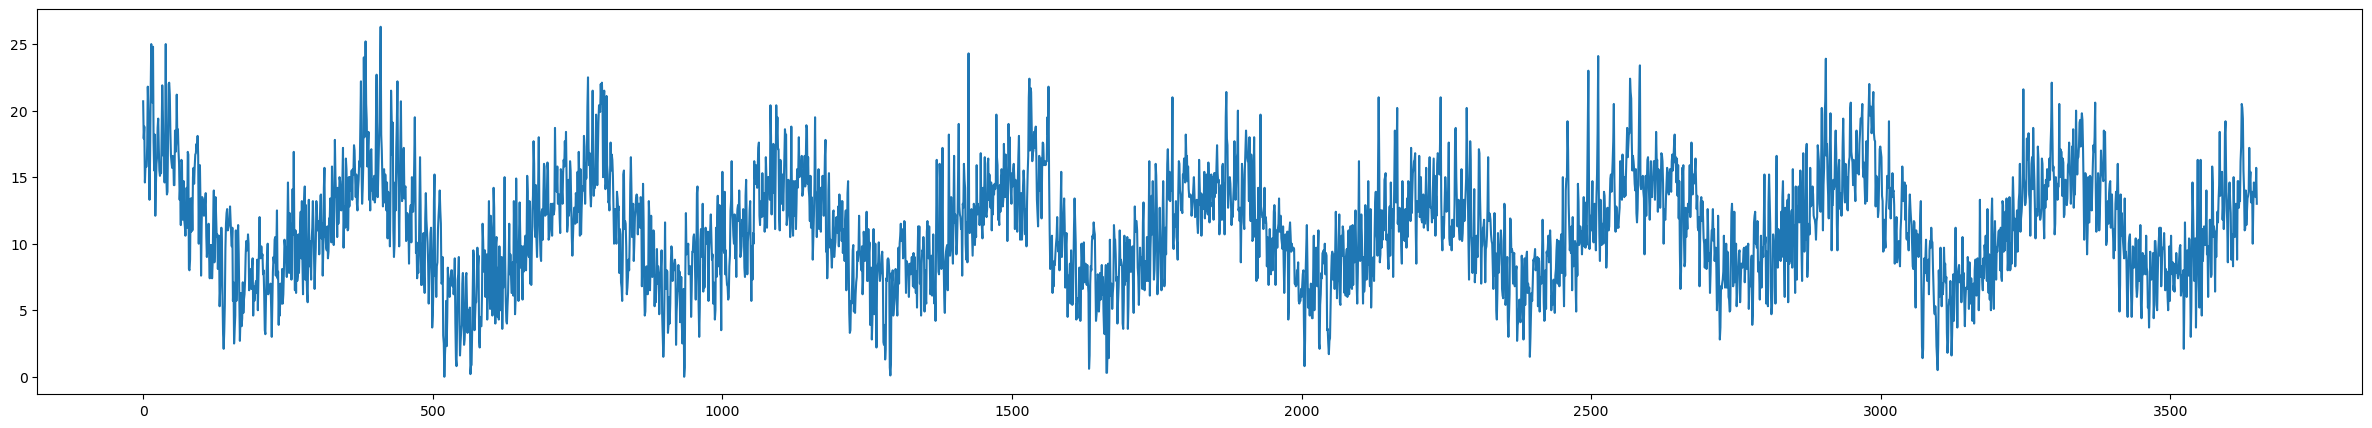

In [6]:
df.Temp.plot(figsize=(30,5))
plt.show()

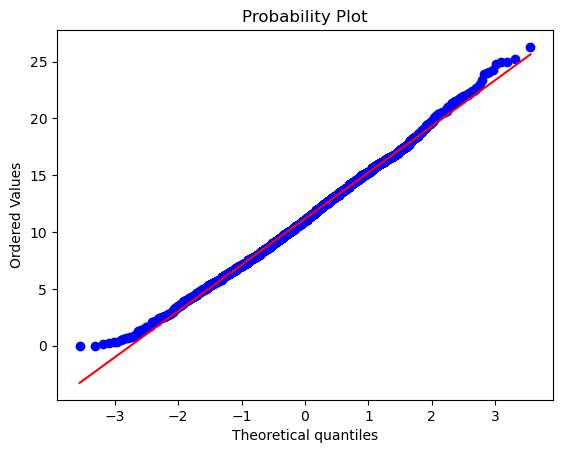

In [7]:
scipy.stats.probplot(df.Temp,plot=pylab)

pylab.show()

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date',inplace=True)

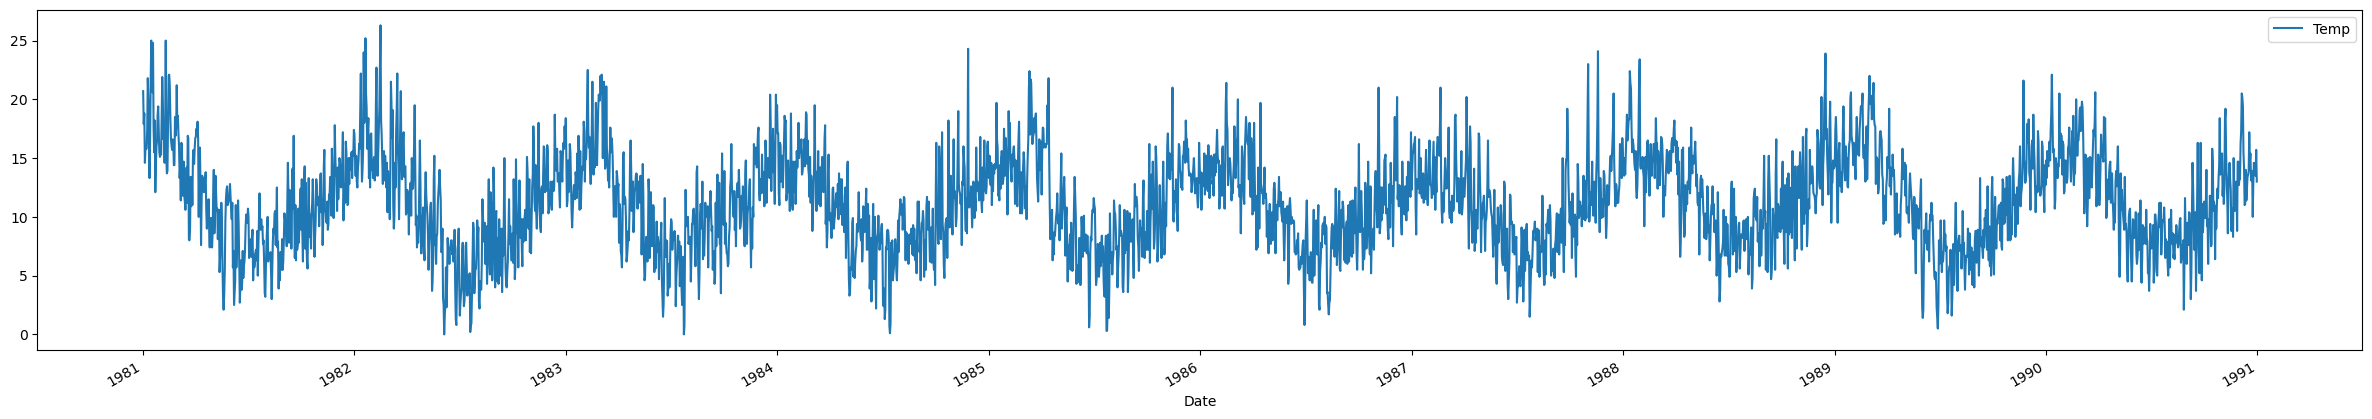

In [7]:
df.plot(figsize=(30,5))
plt.show()

In [8]:
df_m=df.resample('M').mean()

In [8]:
df_m.isnull().sum()

Temp    0
dtype: int64

In [9]:
import statsmodels.tsa.stattools as sts

sts.adfuller(df_m.Temp)

(-1.8923126029292914,
 0.3356861020649802,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 314.6487162773361)

In [7]:
df_m

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


In [10]:
#method 1:differencing

def difference(dataset,interval=1):
  diff=list()
  for i in range(interval,len(dataset)):
    value=dataset[i]-dataset[i-interval]
    diff.append(value)
  return diff

In [11]:
temp_diff=difference(df_m.Temp)

In [12]:
df_m=df_m.iloc[1:,:]

In [13]:
df_m['temp_diff']=temp_diff

In [14]:
df_m

,Temp,temp_diff
Date,,
1981-02-28,17.678571,-0.034332
1981-03-31,13.500000,-4.178571
1981-04-30,12.356667,-1.143333
1981-05-31,9.490323,-2.866344
1981-06-30,7.306667,-2.183656
...,...,...
1990-08-31,7.825806,-0.358065
1990-09-30,9.166667,1.340860
1990-10-31,11.345161,2.178495


In [16]:
sts.adfuller(df_m.temp_diff)

(-4.629576365009949,
 0.00011389116578307524,
 12,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 314.6084436365842)

In [17]:
size = int(len(df_m)*0.75)

df_train = df_m.iloc[:size]
df_test= df_m.iloc[size:]

In [18]:

df_train

,Temp,temp_diff
Date,,
1981-02-28,17.678571,-0.034332
1981-03-31,13.500000,-4.178571
1981-04-30,12.356667,-1.143333
1981-05-31,9.490323,-2.866344
1981-06-30,7.306667,-2.183656
...,...,...
1988-02-29,14.524138,-1.969410
1988-03-31,14.748387,0.224249
1988-04-30,12.833333,-1.915054


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

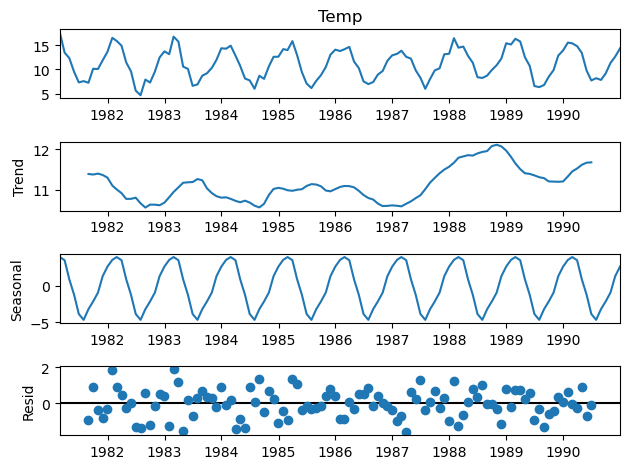

In [20]:
s_dec_add =seasonal_decompose(df_m.Temp,model='additive')

s_dec_add.plot()

plt.show()

In [21]:
import statsmodels.graphics.tsaplots as sgt

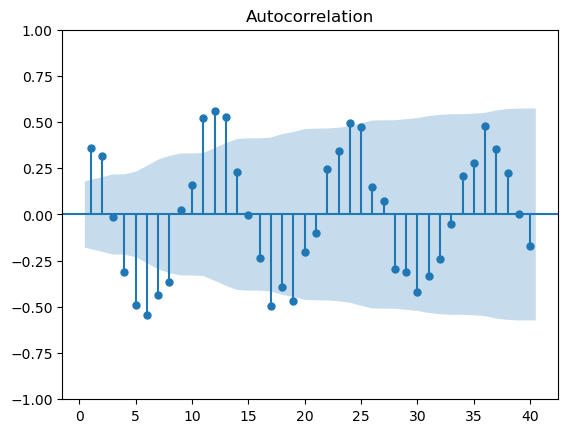

In [22]:
sgt.plot_acf(df_m.temp_diff,lags=40,zero=False)
plt.show()

In [ ]:
q=6

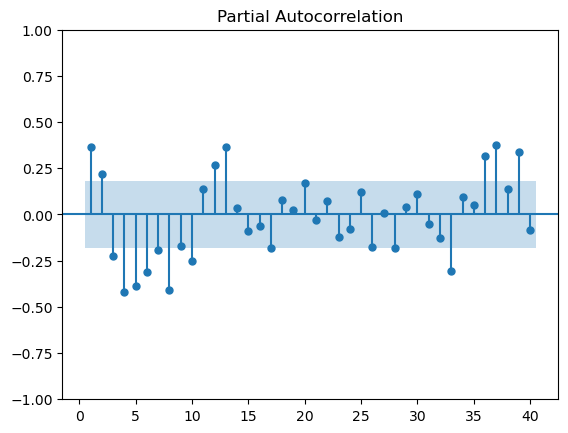

In [30]:
sgt.plot_pacf(df_m.temp_diff,lags=40,zero=False)
plt.show()

q = 6 or 12 for MA model

p = 3 or 6 for AR model (3-4-6-8)

s = 12
s: The number of time steps for a single seasonal period.
P = 1
Q= 1


Importantly, the m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.

A P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1) or t-12. A P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).

Similarly, a D of 1 would calculate a first order seasonal difference and a Q=1 would use a first order errors in the model (e.g. moving average).

In [24]:
#SaRIMA model for mountly temp

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model_SARIMAX=SARIMAX(df_train.Temp,order=(1,1,1),seasonal_order=(1,0,0,12))
result_SARIMAX=model_SARIMAX.fit()
result_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Temp   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -156.023
Date:                             Fri, 27 Jan 2023   AIC                            320.045
Time:                                     23:16:56   BIC                            329.955
Sample:                                 02-28-1981   HQIC                           324.038
                                      - 06-30-1988                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3227      0.119      2.722      0.006       0.090       0.555
ma.L1         -0.9998      1.560     -0.641      0.522      -4.058       2.059
ar.S.L12       0.8571      0.058     14.759      0.000       0.743       0.971
sigma2         1.6770      2.592      0.647      0.518      -3.404       6.758
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.36   Prob(JB):                         0.98
Heteroskedasticity (H):               0.45   Skew:                             0.06
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model_SARIMAX1=SARIMAX(df_train.Temp,order=(3,1,2),seasonal_order=(1,0,0,12))
result_SARIMAX1=model_SARIMAX1.fit()
result_SARIMAX1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Temp   No. Observations:                   89
Model:             SARIMAX(3, 1, 2)x(1, 0, [], 12)   Log Likelihood                -149.035
Date:                             Fri, 27 Jan 2023   AIC                            312.070
Time:                                     23:18:02   BIC                            329.412
Sample:                                 02-28-1981   HQIC                           319.057
                                      - 06-30-1988                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7580      0.109     -6.933      0.000      -0.972      -0.544
ar.L2          0.4408      0.162      2.725      0.006       0.124       0.758
ar.L3          0.3493      0.106      3.301      0.001       0.142       0.557
ma.L1         -0.0001   7290.022   -1.7e-08      1.000   -1.43e+04    1.43e+04
ma.L2         -0.9999   7292.954     -0.000      1.000   -1.43e+04    1.43e+04
ar.S.L12       0.8934      0.043     20.960      0.000       0.810       0.977
sigma2         1.4076   1.03e+04      0.000      1.000   -2.01e+04    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.61   Prob(JB):                         0.76
Heteroskedasticity (H):               0.40   Skew:                            -0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
residsar=result_SARIMAX1.resid

In [51]:
residsar.describe()

count    89.000000
mean     -0.007613
std       2.422130
min      -4.847733
25%      -1.115275
50%       0.056765
75%       0.776458
max      17.678571
dtype: float64

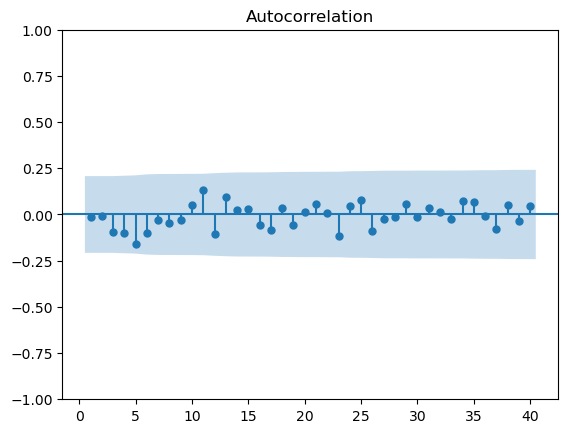

In [54]:
sgt.plot_acf(residsar,lags=40,zero=False)

plt.show()

In [52]:
re=pd.DataFrame(residsar)

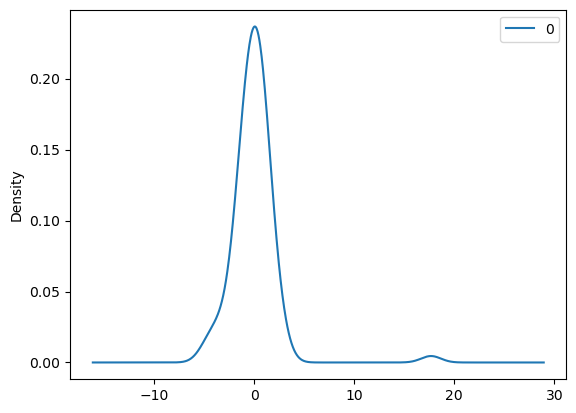

In [53]:
re.plot(kind='kde')

plt.show()

In [55]:
model_SARIMAX2=SARIMAX(df_train.Temp,order=(3,1,2),seasonal_order=(1,0,1,12))
result_SARIMAX2=model_SARIMAX2.fit()
result_SARIMAX2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Temp   No. Observations:                   89
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -140.243
Date:                              Fri, 27 Jan 2023   AIC                            296.487
Time:                                      23:22:10   BIC                            316.305
Sample:                                  02-28-1981   HQIC                           304.471
                                       - 06-30-1988                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7601      0.105     -7.248      0.000      -0.966      -0.555
ar.L2          0.3850      0.158      2.438      0.015       0.075       0.695
ar.L3          0.2828      0.123      2.296      0.022       0.041       0.524
ma.L1         -0.0043      0.339     -0.013      0.990      -0.668       0.659
ma.L2         -0.9957      0.338     -2.950      0.003      -1.657      -0.334
ar.S.L12       0.9994      0.005    215.869      0.000       0.990       1.008
ma.S.L12      -0.9065      0.321     -2.821      0.005      -1.536      -0.277
sigma2         0.9103      0.405      2.250      0.024       0.117       1.703
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.65   Prob(JB):                         0.48
Heteroskedasticity (H):               0.63   Skew:                             0.17
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
resid62=result_SARIMAX2.resid

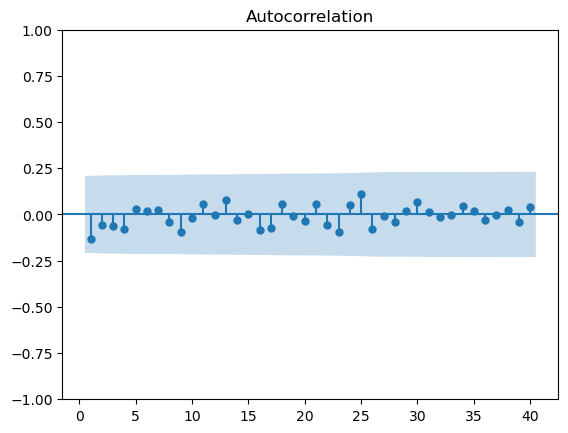

In [64]:
sgt.plot_acf(resid62,lags=40,zero=False)

plt.show()

In [62]:
model_SARIMAX2=SARIMAX(df_train.Temp,order=(6,1,2),seasonal_order=(1,0,1,12))
result_SARIMAX2=model_SARIMAX2.fit()
result_SARIMAX2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Temp   No. Observations:                   89
Model:             SARIMAX(6, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -134.796
Date:                              Fri, 27 Jan 2023   AIC                            291.593
Time:                                      23:32:29   BIC                            318.844
Sample:                                  02-28-1981   HQIC                           302.572
                                       - 06-30-1988                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5207      0.118     -4.394      0.000      -0.753      -0.288
ar.L2          0.5111      0.111      4.602      0.000       0.293       0.729
ar.L3          0.1541      0.156      0.991      0.322      -0.151       0.459
ar.L4         -0.1549      0.125     -1.241      0.215      -0.399       0.090
ar.L5         -0.3071      0.118     -2.608      0.009      -0.538      -0.076
ar.L6         -0.4233      0.090     -4.686      0.000      -0.600      -0.246
ma.L1         -0.1311      0.271     -0.484      0.628      -0.662       0.400
ma.L2         -0.8663      0.257     -3.370      0.001      -1.370      -0.362
ar.S.L12       0.9245      0.101      9.190      0.000       0.727       1.122
ma.S.L12      -0.5962      0.268     -2.222      0.026      -1.122      -0.070
sigma2         1.0667      0.374      2.853      0.004       0.334       1.800
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.83   Prob(JB):                         0.51
Heteroskedasticity (H):               0.45   Skew:                             0.20
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
df_test

,Temp,temp_diff
Date,,
1988-07-31,8.232258,-0.154409
1988-08-31,8.725806,0.493548
1988-09-30,9.883333,1.157527
1988-10-31,10.890323,1.006989
1988-11-30,12.253333,1.363011
1988-12-31,15.436667,3.183333
1989-01-31,15.180645,-0.256022
1989-02-28,16.371429,1.190783
1989-03-31,15.803226,-0.568203


In [27]:
start='1988-07-02'
end='1990-12-31'

In [28]:
df_pred62s=result_SARIMAX2.predict(start=start,end=end)

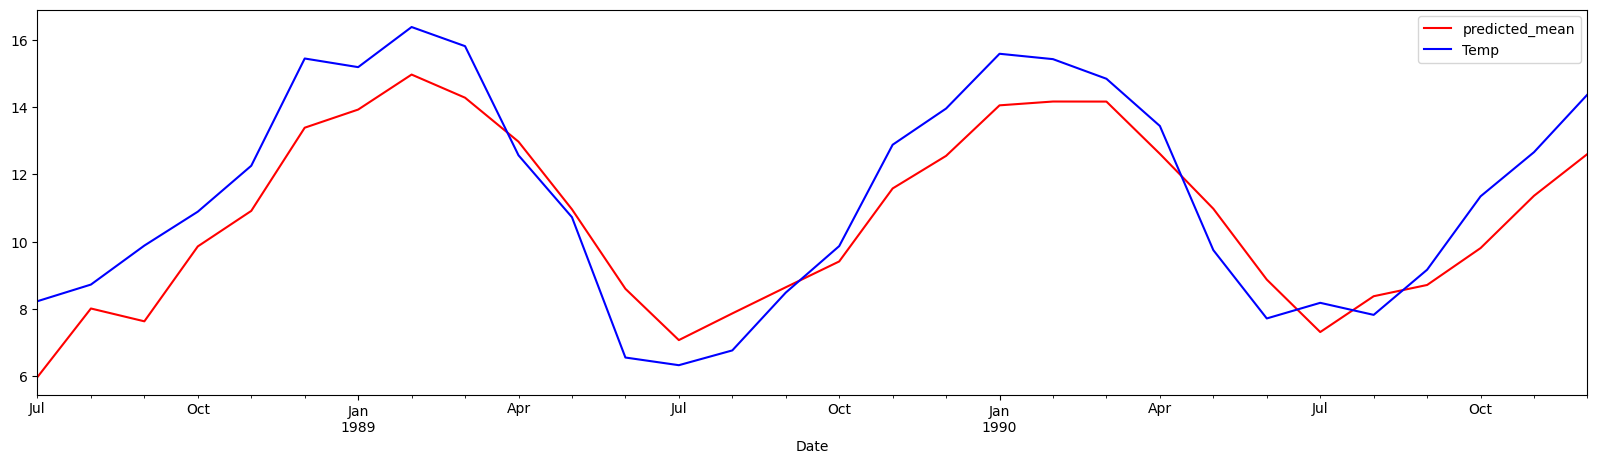

In [29]:
plt.grid(True)
df_pred62s.plot(figsize=(20,5),c='r')

df_test.Temp[start:end].plot(figsize=(20,5),c='b')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [71]:
def root_mean_squared_error(y_true, y_pred): 
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)

    return rmse

In [72]:
def validation_metrics(y_true,y_pred):
  r2=r2_score(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  rmse=root_mean_squared_error(y_true,y_pred)
  mae=mean_absolute_error(y_true,y_pred)

  return print('r2= '+str(r2),' mse= '+str(mse),' rmse= '+str(rmse),' mae= '+str(mae))

In [73]:
validation_metrics(df_test.Temp[start:end],df_pred62s)

r2= 0.8444255763378883  mse= 1.5106837988004038  rmse= 1.2290987750382  mae= 1.102295610348293
